In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tr_d=r'./train_data.txt'
tr_da=pd.read_csv(tr_d,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [3]:
tr_da.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
tr_da.isnull().sum()

Movie_name     0
Gener          0
Description    0
dtype: int64

In [5]:
tr_da.shape


(20652, 3)

In [6]:
tr_da.info


<bound method DataFrame.info of                                         Movie_name          Gener  \
1                    Oscar et la dame rose (2009)          drama    
2                                    Cupid (1997)       thriller    
3                Young, Wild and Wonderful (1980)          adult    
4                           The Secret Sin (1915)          drama    
5                          The Unrecovered (2007)          drama    
...                                            ...            ...   
20648              "Misticheskaya Ukraina" (2012)        fantasy    
20649                       The Invisibles (2013)          short    
20650   "TCM Spotlight: Australian Cinema" (2014)      talk-show    
20651                      El hombre nuevo (2015)    documentary    
20652                      Zombi Holocaust (1980)         horror    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and

In [7]:
te_d=r'./test_data.txt'
te_da=pd.read_csv(te_d,sep=":::",names=["Movie_name","Gener","Description"],engine="python")

In [8]:
te_da.head()

,Movie_name,Gener,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
te_da.isnull().sum()

Movie_name     0
Gener          0
Description    0
dtype: int64

In [10]:
te_da.info

<bound method DataFrame.info of        Movie_name                                           Gener  \
0               1                           Edgar's Lunch (1998)    
1               2                       La guerra de papá (1977)    
2               3                    Off the Beaten Track (2010)    
3               4                         Meu Amigo Hindu (2015)    
4               5                              Er nu zhai (1955)    
...           ...                                             ...   
39977       39978                                 Boss (2013/II)    
39978       39979                          Embalming Love (2004)    
39979       39980   The World's Most Dangerous Polka Band (2006)    
39980       39981                         Damien: Omen II (1978)    
39981       39982          Dissolving Barriers to Success (2004)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 

In [11]:
te_da.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39977    False
39978    False
39979    False
39980    False
39981    False
Length: 39982, dtype: bool

Text(0.5, 1.0, 'Gener distripution')

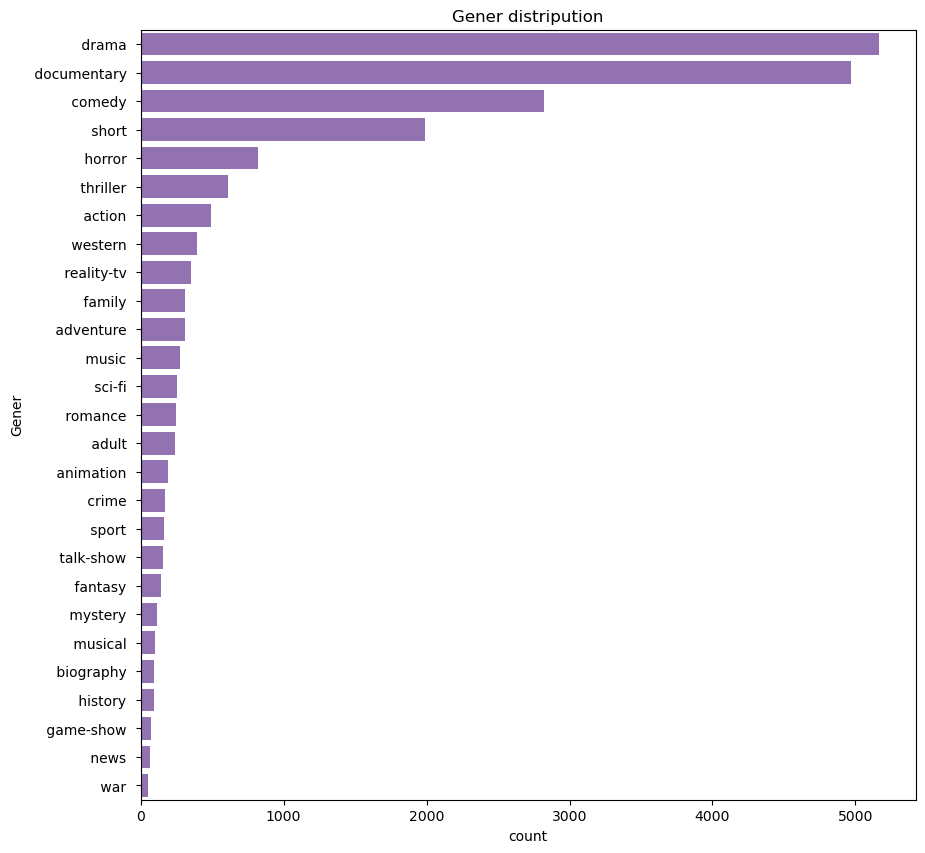

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data=tr_da,order= tr_da["Gener"].value_counts().index,y="Gener",color="#9467bd")
plt.title("Gener distripution")

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
stop_words=stopwords.words("english")
import string
import nltk
import re

In [15]:




def text_preprocessing(text):
   
    text = text.lower()
    
    text = re.sub(r'\S*@\S*\s?', '', text)
  
    text = re.sub(r'http\S+', '', text)
   
    text = re.sub(r'[^a-zA-Z]', ' ', text)
   
    text = "".join([char for char in text if char not in string.punctuation])
    
    words = word_tokenize(text)
   
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
   
    text = re.sub(r'\s+', ' ', text).strip()
    return text
tr_da['clean_description']=tr_da['Description'].apply(text_preprocessing)    
te_da['clean_description']=te_da['Description'].apply(text_preprocessing)

In [16]:
te_da.head()

,Movie_name,Gener,Description,clean_description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

x_train=vect.fit_transform(tr_da['clean_description'])
x_test=vect.transform(te_da['clean_description'])


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x=x_train
y=tr_da['Gener']
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.metrics import  accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_tr,y_tr)

SVC(gamma=1.0, kernel='sigmoid')

In [20]:

svc.score(x_tr,y_tr) 

0.7707765873736456

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [27]:
na=GaussianNB()
nb=MultinomialNB()
nc=BernoulliNB()

In [29]:
na.fit(x_tr,y_tr)
nb.fit(x_tr,y_tr)
nc.fit(x_tr,y_tr)

TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [ ]:
na.score(x_tr,y_tr)
nb.score(x_tr,y_tr)
nc.score(x_tr,y_tr)